## Курсовой проект для курса "Python для Data Science"

In [1]:
import numpy as np
import pandas as pd
import pickle

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_absolute_error

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_formats = ['svg']

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

## Анализ данных

In [3]:
train.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0  14038          35    2.0  47.981561   29.442751            6.0      7   
1  15053          41    3.0  65.683640   40.049543            8.0      7   
2   4765          53    2.0  44.947953   29.197612            0.0      8   
3   5809          58    2.0  53.352981   52.731512            9.0      8   
4  10783          99    1.0  39.649192   23.776169            7.0     11   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0         9.0       1969   0.089040         B         B        33      7976   
1         9.0       1978   0.000070         B         B        46     10309   
2        12.0       1968   0.049637         B         B        34      7759   
3        17.0       1977   0.437885         B         B        23      5735   
4        12.0       1976   0.012339         B         B        35      5776   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2          Price  
0         5           NaN            0       11       B  184966.930730  
1         1         240.0            1       16       B  300009.450063  
2         0         229.0            1        3       B  220925.908524  
3         3        1084.0            0        5       B  175616.227217  
4         1        2078.0            2        4       B  150226.531644

In [4]:
test.head()

Id  DistrictId  Rooms     Square  LifeSquare  KitchenSquare  Floor  \
0    725          58    2.0  49.882643   33.432782            6.0      6   
1  15856          74    2.0  69.263183         NaN            1.0      6   
2   5480         190    1.0  13.597819   15.948246           12.0      2   
3  15664          47    2.0  73.046609   51.940842            9.0     22   
4  14275          27    1.0  47.527111   43.387569            1.0     17   

   HouseFloor  HouseYear  Ecology_1 Ecology_2 Ecology_3  Social_1  Social_2  \
0        14.0       1972   0.310199         B         B        11      2748   
1         1.0       1977   0.075779         B         B         6      1437   
2         5.0       1909   0.000000         B         B        30      7538   
3        22.0       2007   0.101872         B         B        23      4583   
4        17.0       2017   0.072158         B         B         2       629   

   Social_3  Healthcare_1  Helthcare_2  Shops_1 Shops_2  
0         1           NaN            0        0       B  
1         3           NaN            0        2       B  
2        87        4702.0            5        5       B  
3         3           NaN            3        3       B  
4         1           NaN            0        0       A

In [5]:
print(train.shape, test.shape)

(10000, 20) (5000, 19)


In [6]:
list(train)

['Id',
 'DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Ecology_2',
 'Ecology_3',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1',
 'Shops_2',
 'Price']

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     7887 non-null   float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   5202 non-null   float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     3959 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   2623 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

In [9]:
train.describe()

Id    DistrictId         Rooms        Square   LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  7887.000000   
mean    8383.40770     50.400800      1.890500     56.315775    37.199645   
std     4859.01902     43.587592      0.839512     21.058732    86.241209   
min        0.00000      0.000000      0.000000      1.136859     0.370619   
25%     4169.50000     20.000000      1.000000     41.774881    22.769832   
50%     8394.50000     36.000000      2.000000     52.513310    32.781260   
75%    12592.50000     75.000000      2.000000     65.900625    45.128803   
max    16798.00000    209.000000     19.000000    641.065193  7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000   5202.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875   1021.517264      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    350.000000      0.000000   
50%       25.000000   5285.000000      2.000000    900.000000      1.000000   
75%       36.000000   7227.000000      5.000000   1548.000000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  
count  10000.000000   10000.000000  
mean       4.231300  214138.857399  
std        4.806341   92872.293865  
min        0.000000   59174.778028  
25%        1.000000  153872.633942  
50%        3.000000  192269.644879  
75%        6.000000  249135.462171  
max       23.000000  633233.466570

In [10]:
train.describe(include='object')

Ecology_2 Ecology_3 Shops_2
count      10000     10000   10000
unique         2         2       2
top            B         B       B
freq        9903      9725    9175

In [11]:
train['Ecology_2'].value_counts()

B    9903
A      97
Name: Ecology_2, dtype: int64

In [12]:
train['Ecology_3'].value_counts()

B    9725
A     275
Name: Ecology_3, dtype: int64

In [13]:
train['Shops_2'].value_counts()

B    9175
A     825
Name: Shops_2, dtype: int64

## Замена пропусков

In [14]:
#
train.groupby('Rooms')['LifeSquare'].median()

Rooms
0.0     85.125471
1.0     21.663929
2.0     32.552134
3.0     46.960480
4.0     64.946548
5.0     80.458910
6.0     38.702244
10.0    37.321877
19.0    21.779288
Name: LifeSquare, dtype: float64

In [15]:
train['Rooms'].value_counts()

2.0     3880
1.0     3705
3.0     2235
4.0      150
5.0       18
0.0        8
10.0       2
19.0       1
6.0        1
Name: Rooms, dtype: int64

In [16]:
train['LifeSquare'].fillna(train['LifeSquare'].mean(), inplace=True)
train['Healthcare_1'].fillna(train['Healthcare_1'].mean(), inplace=True)

test['LifeSquare'].fillna(train['LifeSquare'].mean(), inplace=True)
test['Healthcare_1'].fillna(train['Healthcare_1'].mean(), inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             10000 non-null  int64  
 1   DistrictId     10000 non-null  int64  
 2   Rooms          10000 non-null  float64
 3   Square         10000 non-null  float64
 4   LifeSquare     10000 non-null  float64
 5   KitchenSquare  10000 non-null  float64
 6   Floor          10000 non-null  int64  
 7   HouseFloor     10000 non-null  float64
 8   HouseYear      10000 non-null  int64  
 9   Ecology_1      10000 non-null  float64
 10  Ecology_2      10000 non-null  object 
 11  Ecology_3      10000 non-null  object 
 12  Social_1       10000 non-null  int64  
 13  Social_2       10000 non-null  int64  
 14  Social_3       10000 non-null  int64  
 15  Healthcare_1   10000 non-null  float64
 16  Helthcare_2    10000 non-null  int64  
 17  Shops_1        10000 non-null  int64  
 18  Shops_2

In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             5000 non-null   int64  
 1   DistrictId     5000 non-null   int64  
 2   Rooms          5000 non-null   float64
 3   Square         5000 non-null   float64
 4   LifeSquare     5000 non-null   float64
 5   KitchenSquare  5000 non-null   float64
 6   Floor          5000 non-null   int64  
 7   HouseFloor     5000 non-null   float64
 8   HouseYear      5000 non-null   int64  
 9   Ecology_1      5000 non-null   float64
 10  Ecology_2      5000 non-null   object 
 11  Ecology_3      5000 non-null   object 
 12  Social_1       5000 non-null   int64  
 13  Social_2       5000 non-null   int64  
 14  Social_3       5000 non-null   int64  
 15  Healthcare_1   5000 non-null   float64
 16  Helthcare_2    5000 non-null   int64  
 17  Shops_1        5000 non-null   int64  
 18  Shops_2 

### Заменим обьекты object в train и test

In [19]:
#Заменим признаки категории Object на медианные значения целевой переменной в группе
Eco_2_gr = train.groupby('Ecology_2')['Price'].median().round(2)

Eco_2_gr

Ecology_2
A    182516.56
B    192371.63
Name: Price, dtype: float64

In [20]:
Eco_3_gr = train.groupby('Ecology_3')['Price'].median().round(2)

Eco_3_gr

Ecology_3
A    211889.94
B    191668.40
Name: Price, dtype: float64

In [21]:
Shops_2_gr = train.groupby('Shops_2')['Price'].median().round(2)

Shops_2_gr

Shops_2
A    181620.00
B    193446.13
Name: Price, dtype: float64

In [22]:
train = train.merge(Eco_2_gr, on='Ecology_2', how='left', suffixes=['', '_in_eco2_gr'])
train = train.merge(Eco_3_gr, on='Ecology_3', how='left', suffixes=['', '_in_eco_3_gr'])
train = train.merge(Shops_2_gr, on='Shops_2', how='left', suffixes=['', '_in_shops_2_gr'])

test = test.merge(Eco_2_gr, on='Ecology_2', how='left', suffixes=['', '_in_eco2_gr'])
test = test.merge(Eco_3_gr, on='Ecology_3', how='left', suffixes=['', '_in_eco_gr'])
test = test.merge(Shops_2_gr, on='Shops_2', how='left', suffixes=['', '_in_shops_2_gr'])

train.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace=True)
test.drop(['Ecology_2', 'Ecology_3', 'Shops_2'], axis=1, inplace=True)

test.rename(columns={'Price' : 'Price_in_eco_2_gr'}, inplace=True)

In [23]:
train.describe()

Id    DistrictId         Rooms        Square    LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    8383.40770     50.400800      1.890500     56.315775     37.199645   
std     4859.01902     43.587592      0.839512     21.058732     76.588742   
min        0.00000      0.000000      0.000000      1.136859      0.370619   
25%     4169.50000     20.000000      1.000000     41.774881     25.527399   
50%     8394.50000     36.000000      2.000000     52.513310     37.199645   
75%    12592.50000     75.000000      2.000000     65.900625     41.427234   
max    16798.00000    209.000000     19.000000    641.065193   7480.592129   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118858   
std        28.560917      5.241148      6.775974  2.005003e+05      0.119025   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.017647   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.075424   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.195781   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.521867   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.904460      1.319500   
std       17.532614   4006.799803     23.831875    736.734238      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    830.000000      0.000000   
50%       25.000000   5285.000000      2.000000   1142.904460      1.000000   
75%       36.000000   7227.000000      5.000000   1142.904460      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  Price_in_eco2_gr  Price_in_eco_3_gr  \
count  10000.000000   10000.000000      10000.000000       10000.000000   
mean       4.231300  214138.857399     192276.035821      192224.492350   
std        4.806341   92872.293865        965.941190        3307.098228   
min        0.000000   59174.778028     182516.560000      191668.400000   
25%        1.000000  153872.633942     192371.630000      191668.400000   
50%        3.000000  192269.644879     192371.630000      191668.400000   
75%        6.000000  249135.462171     192371.630000      191668.400000   
max       23.000000  633233.466570     192371.630000      211889.940000   

       Price_in_shops_2_gr  
count         10000.000000  
mean         192470.474275  
std            3253.826376  
min          181620.000000  
25%          193446.130000  
50%          193446.130000  
75%          193446.130000  
max          193446.130000

In [24]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    8412.595400    51.279200     1.910000    56.449500    36.375512   
std     4832.674037    44.179466     0.838594    19.092787    15.866714   
min        1.000000     0.000000     0.000000     1.378543     0.333490   
25%     4221.750000    21.000000     1.000000    41.906231    25.850152   
50%     8320.500000    37.000000     2.000000    52.921340    37.199645   
75%    12598.250000    77.000000     2.000000    66.285129    41.769526   
max    16795.000000   212.000000    17.000000   223.453689   303.071094   

       KitchenSquare        Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean        5.976800     8.632000    12.601000  1984.392600     0.119874   
std         9.950018     5.483228     6.789213    18.573149     0.120070   
min         0.000000     1.000000     0.000000  1908.000000     0.000000   
25%         1.000000     4.000000     9.000000  1973.000000     0.019509   
50%         6.000000     7.000000    12.000000  1977.000000     0.072158   
75%         9.000000    12.000000    17.000000  2000.000000     0.195781   
max       620.000000    78.000000    99.000000  2020.000000     0.521867   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   5000.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1144.873180      1.31940   
std      17.532202   4026.614773    23.863762    756.634413      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    810.000000      0.00000   
50%      25.000000   5285.000000     2.000000   1142.904460      1.00000   
75%      36.000000   7287.000000     5.000000   1142.904460      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  Price_in_eco_2_gr  Price_in_eco_gr  Price_in_shops_2_gr  
count  5000.000000        5000.000000      5000.000000          5000.000000  
mean      4.242800      192277.021328    192271.001892        192471.656888  
std       4.777365         961.045788      3438.716938          3252.193600  
min       0.000000      182516.560000    191668.400000        181620.000000  
25%       1.000000      192371.630000    191668.400000        193446.130000  
50%       3.000000      192371.630000    191668.400000        193446.130000  
75%       6.000000      192371.630000    191668.400000        193446.130000  
max      23.000000      192371.630000    211889.940000        193446.130000

### Тип данный сделаем одинаковым для всех признаков

In [25]:
train = train[:].astype(float).round(2)
test = test[:].astype(float).round(2)

In [26]:
train.head()

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
0  14038.0        35.0    2.0   47.98       29.44            6.0    7.0   
1  15053.0        41.0    3.0   65.68       40.05            8.0    7.0   
2   4765.0        53.0    2.0   44.95       29.20            0.0    8.0   
3   5809.0        58.0    2.0   53.35       52.73            9.0    8.0   
4  10783.0        99.0    1.0   39.65       23.78            7.0   11.0   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0         9.0     1969.0       0.09      33.0    7976.0       5.0   
1         9.0     1978.0       0.00      46.0   10309.0       1.0   
2        12.0     1968.0       0.05      34.0    7759.0       0.0   
3        17.0     1977.0       0.44      23.0    5735.0       3.0   
4        12.0     1976.0       0.01      35.0    5776.0       1.0   

   Healthcare_1  Helthcare_2  Shops_1      Price  Price_in_eco2_gr  \
0        1142.9          0.0     11.0  184966.93         192371.63   
1         240.0          1.0     16.0  300009.45         192371.63   
2         229.0          1.0      3.0  220925.91         192371.63   
3        1084.0          0.0      5.0  175616.23         192371.63   
4        2078.0          2.0      4.0  150226.53         192371.63   

   Price_in_eco_3_gr  Price_in_shops_2_gr  
0           191668.4            193446.13  
1           191668.4            193446.13  
2           191668.4            193446.13  
3           191668.4            193446.13  
4           191668.4            193446.13

In [27]:
test.head()

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
0    725.0        58.0    2.0   49.88       33.43            6.0    6.0   
1  15856.0        74.0    2.0   69.26       37.20            1.0    6.0   
2   5480.0       190.0    1.0   13.60       15.95           12.0    2.0   
3  15664.0        47.0    2.0   73.05       51.94            9.0   22.0   
4  14275.0        27.0    1.0   47.53       43.39            1.0   17.0   

   HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
0        14.0     1972.0       0.31      11.0    2748.0       1.0   
1         1.0     1977.0       0.08       6.0    1437.0       3.0   
2         5.0     1909.0       0.00      30.0    7538.0      87.0   
3        22.0     2007.0       0.10      23.0    4583.0       3.0   
4        17.0     2017.0       0.07       2.0     629.0       1.0   

   Healthcare_1  Helthcare_2  Shops_1  Price_in_eco_2_gr  Price_in_eco_gr  \
0        1142.9          0.0      0.0          192371.63         191668.4   
1        1142.9          0.0      2.0          192371.63         191668.4   
2        4702.0          5.0      5.0          192371.63         191668.4   
3        1142.9          3.0      3.0          192371.63         191668.4   
4        1142.9          0.0      0.0          192371.63         191668.4   

   Price_in_shops_2_gr  
0            193446.13  
1            193446.13  
2            193446.13  
3            193446.13  
4            181620.00

### Избавимся от выбросов

In [28]:
train.describe()

Id    DistrictId         Rooms        Square    LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    8383.40770     50.400800      1.890500     56.315791     37.199726   
std     4859.01902     43.587592      0.839512     21.058771     76.588718   
min        0.00000      0.000000      0.000000      1.140000      0.370000   
25%     4169.50000     20.000000      1.000000     41.777500     25.525000   
50%     8394.50000     36.000000      2.000000     52.510000     37.200000   
75%    12592.50000     75.000000      2.000000     65.900000     41.425000   
max    16798.00000    209.000000     19.000000    641.070000   7480.590000   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  1.000000e+04  10000.000000   
mean        6.273300      8.526700     12.609400  3.990166e+03      0.118954   
std        28.560917      5.241148      6.775974  2.005003e+05      0.118942   
min         0.000000      1.000000      0.000000  1.910000e+03      0.000000   
25%         1.000000      4.000000      9.000000  1.974000e+03      0.020000   
50%         6.000000      7.000000     13.000000  1.977000e+03      0.080000   
75%         9.000000     12.000000     17.000000  2.001000e+03      0.200000   
max      2014.000000     42.000000    117.000000  2.005201e+07      0.520000   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.902320      1.319500   
std       17.532614   4006.799803     23.831875    736.734238      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    830.000000      0.000000   
50%       25.000000   5285.000000      2.000000   1142.900000      1.000000   
75%       36.000000   7227.000000      5.000000   1142.900000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  Price_in_eco2_gr  Price_in_eco_3_gr  \
count  10000.000000   10000.000000      10000.000000       10000.000000   
mean       4.231300  214138.857411     192276.035821      192224.492350   
std        4.806341   92872.293859        965.941190        3307.098228   
min        0.000000   59174.780000     182516.560000      191668.400000   
25%        1.000000  153872.637500     192371.630000      191668.400000   
50%        3.000000  192269.645000     192371.630000      191668.400000   
75%        6.000000  249135.462500     192371.630000      191668.400000   
max       23.000000  633233.470000     192371.630000      211889.940000   

       Price_in_shops_2_gr  
count         10000.000000  
mean         192470.474275  
std            3253.826376  
min          181620.000000  
25%          193446.130000  
50%          193446.130000  
75%          193446.130000  
max          193446.130000

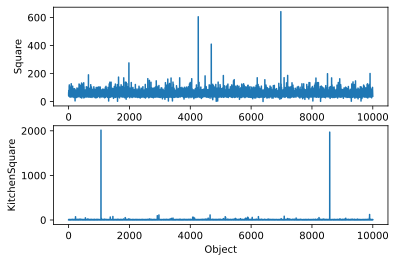

In [29]:
# Найдем выбросы на графиках и заменим на медианы
matplotlib.rcParams.update({'font.size': 10})

plt.subplot(211)
plt.plot(train['Square'])
plt.xlabel('Object')
plt.ylabel('Square')
    
plt.subplot(212)
plt.plot(train['KitchenSquare'])
plt.xlabel('Object')
plt.ylabel('KitchenSquare')

plt.show()

In [30]:
train.loc[train['KitchenSquare'] > 300, 'KitchenSquare'] = train['KitchenSquare'].median()
train.loc[train['Square'] > 400, 'Square'] = train['Square'].median()

test.loc[test['KitchenSquare'] > 300, 'KitchenSquare'] = train['KitchenSquare'].median()
test.loc[test['Square'] > 400, 'Square'] = train['Square'].median()

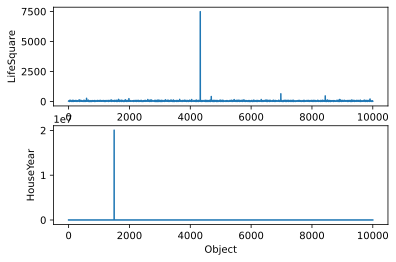

In [31]:
plt.subplot(211)
plt.plot(train['LifeSquare'])
plt.xlabel('Object')
plt.ylabel('LifeSquare')
    
plt.subplot(212)
plt.plot(train['HouseYear'])
plt.xlabel('Object')
plt.ylabel('HouseYear')

plt.show()

In [32]:
train.loc[train['LifeSquare'] > 250, 'LifeSquare'] = train['LifeSquare'].median()
train.loc[train['HouseYear'] > 2020, 'HouseYear'] = train['HouseYear'].median()

test.loc[test['LifeSquare'] > 250, 'LifeSquare'] = train['LifeSquare'].median()
test.loc[test['HouseYear'] > 2020, 'HouseYear'] = train['HouseYear'].median()

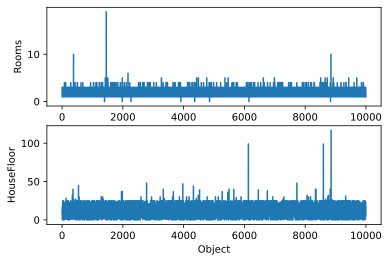

In [33]:
plt.subplot(211)
plt.plot(train['Rooms'])
plt.xlabel('Object')
plt.ylabel('Rooms')
    
plt.subplot(212)
plt.plot(train['HouseFloor'])
plt.xlabel('Object')
plt.ylabel('HouseFloor')

plt.show()

In [34]:
train.loc[train['Rooms'] > 5, 'Rooms'] = train['Rooms'].median()
train.loc[train['HouseFloor'] > 50, 'HouseFloor'] = train['HouseFloor'].median()
train.loc[train['Floor'] > 50, 'Floor'] = train['Floor'].median()

test.loc[test['Rooms'] > 5, 'Rooms'] = train['Rooms'].median()
test.loc[test['HouseFloor'] > 50, 'HouseFloor'] = train['HouseFloor'].median()
test.loc[test['Floor'] > 50, 'Floor'] = train['Floor'].median()

In [35]:
train.describe()

Id    DistrictId         Rooms        Square    LifeSquare  \
count  10000.00000  10000.000000  10000.000000  10000.000000  10000.000000   
mean    8383.40770     50.400800      1.886800     56.166023     36.292887   
std     4859.01902     43.587592      0.812805     19.149667     15.838506   
min        0.00000      0.000000      0.000000      1.140000      0.370000   
25%     4169.50000     20.000000      1.000000     41.777500     25.525000   
50%     8394.50000     36.000000      2.000000     52.510000     37.200000   
75%    12592.50000     75.000000      2.000000     65.890000     41.412500   
max    16798.00000    209.000000      5.000000    275.650000    233.950000   

       KitchenSquare         Floor    HouseFloor     HouseYear     Ecology_1  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean        5.876100      8.526700     12.581800   1984.863800      0.118954   
std         5.174014      5.241148      6.582586     18.409979      0.118942   
min         0.000000      1.000000      0.000000   1910.000000      0.000000   
25%         1.000000      4.000000      9.000000   1974.000000      0.020000   
50%         6.000000      7.000000     13.000000   1977.000000      0.080000   
75%         9.000000     12.000000     17.000000   2001.000000      0.200000   
max       123.000000     42.000000     48.000000   2020.000000      0.520000   

           Social_1      Social_2      Social_3  Healthcare_1   Helthcare_2  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean      24.687000   5352.157400      8.039200   1142.902320      1.319500   
std       17.532614   4006.799803     23.831875    736.734238      1.493601   
min        0.000000    168.000000      0.000000      0.000000      0.000000   
25%        6.000000   1564.000000      0.000000    830.000000      0.000000   
50%       25.000000   5285.000000      2.000000   1142.900000      1.000000   
75%       36.000000   7227.000000      5.000000   1142.900000      2.000000   
max       74.000000  19083.000000    141.000000   4849.000000      6.000000   

            Shops_1          Price  Price_in_eco2_gr  Price_in_eco_3_gr  \
count  10000.000000   10000.000000      10000.000000       10000.000000   
mean       4.231300  214138.857411     192276.035821      192224.492350   
std        4.806341   92872.293859        965.941190        3307.098228   
min        0.000000   59174.780000     182516.560000      191668.400000   
25%        1.000000  153872.637500     192371.630000      191668.400000   
50%        3.000000  192269.645000     192371.630000      191668.400000   
75%        6.000000  249135.462500     192371.630000      191668.400000   
max       23.000000  633233.470000     192371.630000      211889.940000   

       Price_in_shops_2_gr  
count         10000.000000  
mean         192470.474275  
std            3253.826376  
min          181620.000000  
25%          193446.130000  
50%          193446.130000  
75%          193446.130000  
max          193446.130000

In [36]:
test.describe()

Id   DistrictId        Rooms       Square   LifeSquare  \
count   5000.000000  5000.000000  5000.000000  5000.000000  5000.000000   
mean    8412.595400    51.279200     1.905400    56.449606    36.322456   
std     4832.674037    44.179466     0.806834    19.092749    15.411778   
min        1.000000     0.000000     0.000000     1.380000     0.330000   
25%     4221.750000    21.000000     1.000000    41.907500    25.850000   
50%     8320.500000    37.000000     2.000000    52.920000    37.200000   
75%    12598.250000    77.000000     2.000000    66.282500    41.762500   
max    16795.000000   212.000000     5.000000   223.450000   169.900000   

       KitchenSquare       Floor   HouseFloor    HouseYear    Ecology_1  \
count    5000.000000  5000.00000  5000.000000  5000.000000  5000.000000   
mean        5.854000     8.61780    12.583800  1984.392600     0.119942   
std         4.854668     5.39477     6.678315    18.573149     0.119959   
min         0.000000     1.00000     0.000000  1908.000000     0.000000   
25%         1.000000     4.00000     9.000000  1973.000000     0.020000   
50%         6.000000     7.00000    12.000000  1977.000000     0.070000   
75%         9.000000    12.00000    17.000000  2000.000000     0.200000   
max       112.000000    46.00000    48.000000  2020.000000     0.520000   

          Social_1      Social_2     Social_3  Healthcare_1  Helthcare_2  \
count  5000.000000   5000.000000  5000.000000   5000.000000   5000.00000   
mean     24.933800   5406.900000     8.262600   1144.871060      1.31940   
std      17.532202   4026.614773    23.863762    756.634418      1.47994   
min       0.000000    168.000000     0.000000      0.000000      0.00000   
25%       6.000000   1564.000000     0.000000    810.000000      0.00000   
50%      25.000000   5285.000000     2.000000   1142.900000      1.00000   
75%      36.000000   7287.000000     5.000000   1142.900000      2.00000   
max      74.000000  19083.000000   141.000000   4849.000000      6.00000   

           Shops_1  Price_in_eco_2_gr  Price_in_eco_gr  Price_in_shops_2_gr  
count  5000.000000        5000.000000      5000.000000          5000.000000  
mean      4.242800      192277.021328    192271.001892        192471.656888  
std       4.777365         961.045788      3438.716938          3252.193600  
min       0.000000      182516.560000    191668.400000        181620.000000  
25%       1.000000      192371.630000    191668.400000        193446.130000  
50%       3.000000      192371.630000    191668.400000        193446.130000  
75%       6.000000      192371.630000    191668.400000        193446.130000  
max      23.000000      192371.630000    211889.940000        193446.130000

## Корреляция признаков

In [37]:
# Посмотрим какие признаки наиболее корелируют с ценой
train.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

In [38]:
train.corr()['Price'].sort_values(ascending=False)

Price                  1.000000
Square                 0.577891
Rooms                  0.570698
LifeSquare             0.357640
DistrictId             0.265100
Social_1               0.263286
Helthcare_2            0.253090
KitchenSquare          0.247940
Social_2               0.239226
Shops_1                0.180876
Floor                  0.128715
Healthcare_1           0.105417
HouseFloor             0.089426
Social_3               0.074878
Price_in_shops_2_gr    0.070388
Price_in_eco_3_gr      0.052585
HouseYear              0.036574
Price_in_eco2_gr       0.022379
Id                     0.009880
Ecology_1             -0.056789
Name: Price, dtype: float64

## Создание новых признаков

### Признак на основе DistrictId

In [39]:
# Создадим признак средняя цена метра по районам
meter_price_by_district = pd.DataFrame(train.groupby('DistrictId')['Price'].median()
                                     / train.groupby('DistrictId')['Square'].median()).round(2)
meter_price_by_district.rename(columns={0 : 'meter_price_by_district'}, inplace=True)

train = train.merge(meter_price_by_district, on='DistrictId', how='left')

train.sort_values('DistrictId')

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
9507  11508.0         0.0    2.0   53.13       32.03           11.0   10.0   
745    9982.0         0.0    3.0   89.64       49.97           10.0    1.0   
5577   7797.0         0.0    2.0   43.34       27.17            5.0    6.0   
8364  11243.0         0.0    1.0   46.57       21.55           10.0   11.0   
4620   2035.0         0.0    2.0   47.95       31.63            5.0    4.0   
...       ...         ...    ...     ...         ...            ...    ...   
7553  16543.0       205.0    1.0   43.23       18.66            8.0   12.0   
3443  11120.0       207.0    3.0   76.78       55.77            7.0    2.0   
1210  16060.0       208.0    2.0   54.60       32.86            8.0   10.0   
2931  15838.0       208.0    2.0   53.12       33.94            7.0    7.0   
7650  11911.0       209.0    1.0   33.53       18.10            5.0    7.0   

      HouseFloor  HouseYear  Ecology_1  ...  Social_2  Social_3  Healthcare_1  \
9507        16.0     1984.0       0.32  ...    4756.0      16.0        2857.0   
745         17.0     2009.0       0.01  ...    5285.0       0.0         645.0   
5577         5.0     1964.0       0.32  ...    4756.0      16.0        2857.0   
8364        19.0     2011.0       0.01  ...    5285.0       0.0         645.0   
4620         5.0     1965.0       0.32  ...    4756.0      16.0        2857.0   
...          ...        ...        ...  ...       ...       ...           ...   
7553        12.0     2007.0       0.17  ...    3856.0      10.0        1142.9   
3443         5.0     1931.0       0.00  ...    3681.0      73.0        1815.0   
1210         9.0     1957.0       0.08  ...    2738.0      20.0        1142.9   
2931         7.0     1954.0       0.08  ...    2738.0      20.0        1142.9   
7650         5.0     1965.0       0.04  ...    3478.0      11.0        2729.0   

      Helthcare_2  Shops_1      Price  Price_in_eco2_gr  Price_in_eco_3_gr  \
9507          5.0      8.0  244900.25         192371.63           191668.4   
745           6.0      6.0  184968.36         192371.63           191668.4   
5577          5.0      8.0  176210.81         192371.63           191668.4   
8364          6.0      6.0  102434.33         192371.63           191668.4   
4620          5.0      8.0  177321.00         192371.63           191668.4   
...           ...      ...        ...               ...                ...   
7553          2.0      5.0  220501.57         192371.63           191668.4   
3443          2.0      5.0  426186.41         192371.63           191668.4   
1210          1.0      4.0  433346.42         192371.63           191668.4   
2931          1.0      4.0  428928.89         192371.63           191668.4   
7650          3.0      1.0  140048.80         192371.63           191668.4   

      Price_in_shops_2_gr  meter_price_by_district  
9507            193446.13                  3387.00  
745             193446.13                  3387.00  
5577            193446.13                  3387.00  
8364            193446.13                  3387.00  
4620            193446.13                  3387.00  
...                   ...                      ...  
7553            193446.13                  5100.66  
3443            193446.13                  5550.75  
1210            193446.13                  8004.78  
2931            193446.13                  8004.78  
7650            193446.13                  4176.82  

[10000 rows x 21 columns]

In [40]:
test = test.merge(meter_price_by_district, on='DistrictId', how='left')

test.sort_values('DistrictId')

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
4561   4836.0         0.0    3.0   57.97       37.29            5.0    3.0   
2231   6456.0         0.0    2.0   37.63       21.34            6.0    9.0   
2897  11838.0         0.0    1.0   41.39       17.44            8.0   14.0   
514   11567.0         0.0    3.0  108.85       53.43           13.0   20.0   
2831   6607.0         0.0    1.0   34.79       19.94            5.0    6.0   
...       ...         ...    ...     ...         ...            ...    ...   
3194  11205.0       209.0    1.0   34.68       21.93            6.0    7.0   
4719  13426.0       209.0    3.0   57.32       43.19            6.0    4.0   
1043  14939.0       210.0    2.0   54.95       31.22            6.0    3.0   
2666  15655.0       211.0    2.0   46.50       32.28            5.0    5.0   
51    15748.0       212.0    2.0   75.66       36.88           15.0    2.0   

      HouseFloor  HouseYear  Ecology_1  Social_1  Social_2  Social_3  \
4561         8.0     1963.0       0.32      25.0    4756.0      16.0   
2231         9.0     1967.0       0.32      25.0    4756.0      16.0   
2897        17.0     2011.0       0.01      30.0    5285.0       0.0   
514         19.0     2012.0       0.01      30.0    5285.0       0.0   
2831         5.0     1961.0       0.32      25.0    4756.0      16.0   
...          ...        ...        ...       ...       ...       ...   
3194         9.0     1977.0       0.04      25.0    3478.0      11.0   
4719         5.0     1967.0       0.04      25.0    3478.0      11.0   
1043        10.0     1956.0       0.08      20.0    2738.0      20.0   
2666         5.0     1965.0       0.00      16.0    3681.0      73.0   
51           7.0     1929.0       0.00       8.0    1423.0      37.0   

      Healthcare_1  Helthcare_2  Shops_1  Price_in_eco_2_gr  Price_in_eco_gr  \
4561        2857.0          5.0      8.0          192371.63         191668.4   
2231        2857.0          5.0      8.0          192371.63         191668.4   
2897         645.0          6.0      6.0          192371.63         191668.4   
514          645.0          6.0      6.0          192371.63         191668.4   
2831        2857.0          5.0      8.0          192371.63         191668.4   
...            ...          ...      ...                ...              ...   
3194        2729.0          3.0      1.0          192371.63         191668.4   
4719        2729.0          3.0      1.0          192371.63         191668.4   
1043        1142.9          1.0      4.0          192371.63         191668.4   
2666        1815.0          2.0      5.0          192371.63         191668.4   
51           562.0          1.0      8.0          192371.63         191668.4   

      Price_in_shops_2_gr  meter_price_by_district  
4561            193446.13                  3387.00  
2231            193446.13                  3387.00  
2897            193446.13                  3387.00  
514             193446.13                  3387.00  
2831            193446.13                  3387.00  
...                   ...                      ...  
3194            193446.13                  4176.82  
4719            193446.13                  4176.82  
1043            193446.13                      NaN  
2666            193446.13                      NaN  
51              193446.13                      NaN  

[5000 rows x 20 columns]

In [41]:
#Заменим пропуски в переменной district_meter_price
test['meter_price_by_district'].fillna(train['meter_price_by_district'].round(2).median(), inplace=True)

test['meter_price_by_district'].isna().sum()

0

### Признак на основе Rooms

In [42]:
# Создадим признак на основе цены в группе обьектов по колличеству комнат
rooms_meter_price = train.groupby('Rooms')['Price'].median().round(2)

train = train.merge(rooms_meter_price, on='Rooms', how='left', suffixes=['', '_by_rooms'])

In [43]:
train.sort_values('DistrictId')

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
9507  11508.0         0.0    2.0   53.13       32.03           11.0   10.0   
745    9982.0         0.0    3.0   89.64       49.97           10.0    1.0   
5577   7797.0         0.0    2.0   43.34       27.17            5.0    6.0   
8364  11243.0         0.0    1.0   46.57       21.55           10.0   11.0   
4620   2035.0         0.0    2.0   47.95       31.63            5.0    4.0   
...       ...         ...    ...     ...         ...            ...    ...   
7553  16543.0       205.0    1.0   43.23       18.66            8.0   12.0   
3443  11120.0       207.0    3.0   76.78       55.77            7.0    2.0   
1210  16060.0       208.0    2.0   54.60       32.86            8.0   10.0   
2931  15838.0       208.0    2.0   53.12       33.94            7.0    7.0   
7650  11911.0       209.0    1.0   33.53       18.10            5.0    7.0   

      HouseFloor  HouseYear  Ecology_1  ...  Social_3  Healthcare_1  \
9507        16.0     1984.0       0.32  ...      16.0        2857.0   
745         17.0     2009.0       0.01  ...       0.0         645.0   
5577         5.0     1964.0       0.32  ...      16.0        2857.0   
8364        19.0     2011.0       0.01  ...       0.0         645.0   
4620         5.0     1965.0       0.32  ...      16.0        2857.0   
...          ...        ...        ...  ...       ...           ...   
7553        12.0     2007.0       0.17  ...      10.0        1142.9   
3443         5.0     1931.0       0.00  ...      73.0        1815.0   
1210         9.0     1957.0       0.08  ...      20.0        1142.9   
2931         7.0     1954.0       0.08  ...      20.0        1142.9   
7650         5.0     1965.0       0.04  ...      11.0        2729.0   

      Helthcare_2  Shops_1      Price  Price_in_eco2_gr  Price_in_eco_3_gr  \
9507          5.0      8.0  244900.25         192371.63           191668.4   
745           6.0      6.0  184968.36         192371.63           191668.4   
5577          5.0      8.0  176210.81         192371.63           191668.4   
8364          6.0      6.0  102434.33         192371.63           191668.4   
4620          5.0      8.0  177321.00         192371.63           191668.4   
...           ...      ...        ...               ...                ...   
7553          2.0      5.0  220501.57         192371.63           191668.4   
3443          2.0      5.0  426186.41         192371.63           191668.4   
1210          1.0      4.0  433346.42         192371.63           191668.4   
2931          1.0      4.0  428928.89         192371.63           191668.4   
7650          3.0      1.0  140048.80         192371.63           191668.4   

      Price_in_shops_2_gr  meter_price_by_district  Price_by_rooms  
9507            193446.13                  3387.00       200320.76  
745             193446.13                  3387.00       268723.16  
5577            193446.13                  3387.00       200320.76  
8364            193446.13                  3387.00       154979.50  
4620            193446.13                  3387.00       200320.76  
...                   ...                      ...             ...  
7553            193446.13                  5100.66       154979.50  
3443            193446.13                  5550.75       268723.16  
1210            193446.13                  8004.78       200320.76  
2931            193446.13                  8004.78       200320.76  
7650            193446.13                  4176.82       154979.50  

[10000 rows x 22 columns]

In [44]:
test = test.merge(rooms_meter_price, on='Rooms', how='left')

test.rename(columns={'Price' : 'Price_by_rooms'}, inplace=True)

test.sort_values('DistrictId')

Id  DistrictId  Rooms  Square  LifeSquare  KitchenSquare  Floor  \
4561   4836.0         0.0    3.0   57.97       37.29            5.0    3.0   
2231   6456.0         0.0    2.0   37.63       21.34            6.0    9.0   
2897  11838.0         0.0    1.0   41.39       17.44            8.0   14.0   
514   11567.0         0.0    3.0  108.85       53.43           13.0   20.0   
2831   6607.0         0.0    1.0   34.79       19.94            5.0    6.0   
...       ...         ...    ...     ...         ...            ...    ...   
3194  11205.0       209.0    1.0   34.68       21.93            6.0    7.0   
4719  13426.0       209.0    3.0   57.32       43.19            6.0    4.0   
1043  14939.0       210.0    2.0   54.95       31.22            6.0    3.0   
2666  15655.0       211.0    2.0   46.50       32.28            5.0    5.0   
51    15748.0       212.0    2.0   75.66       36.88           15.0    2.0   

      HouseFloor  HouseYear  Ecology_1  ...  Social_2  Social_3  Healthcare_1  \
4561         8.0     1963.0       0.32  ...    4756.0      16.0        2857.0   
2231         9.0     1967.0       0.32  ...    4756.0      16.0        2857.0   
2897        17.0     2011.0       0.01  ...    5285.0       0.0         645.0   
514         19.0     2012.0       0.01  ...    5285.0       0.0         645.0   
2831         5.0     1961.0       0.32  ...    4756.0      16.0        2857.0   
...          ...        ...        ...  ...       ...       ...           ...   
3194         9.0     1977.0       0.04  ...    3478.0      11.0        2729.0   
4719         5.0     1967.0       0.04  ...    3478.0      11.0        2729.0   
1043        10.0     1956.0       0.08  ...    2738.0      20.0        1142.9   
2666         5.0     1965.0       0.00  ...    3681.0      73.0        1815.0   
51           7.0     1929.0       0.00  ...    1423.0      37.0         562.0   

      Helthcare_2  Shops_1  Price_in_eco_2_gr  Price_in_eco_gr  \
4561          5.0      8.0          192371.63         191668.4   
2231          5.0      8.0          192371.63         191668.4   
2897          6.0      6.0          192371.63         191668.4   
514           6.0      6.0          192371.63         191668.4   
2831          5.0      8.0          192371.63         191668.4   
...           ...      ...                ...              ...   
3194          3.0      1.0          192371.63         191668.4   
4719          3.0      1.0          192371.63         191668.4   
1043          1.0      4.0          192371.63         191668.4   
2666          2.0      5.0          192371.63         191668.4   
51            1.0      8.0          192371.63         191668.4   

      Price_in_shops_2_gr  meter_price_by_district  Price_by_rooms  
4561            193446.13                  3387.00       268723.16  
2231            193446.13                  3387.00       200320.76  
2897            193446.13                  3387.00       154979.50  
514             193446.13                  3387.00       268723.16  
2831            193446.13                  3387.00       154979.50  
...                   ...                      ...             ...  
3194            193446.13                  4176.82       154979.50  
4719            193446.13                  4176.82       268723.16  
1043            193446.13                  3969.77       200320.76  
2666            193446.13                  3969.77       200320.76  
51              193446.13                  3969.77       200320.76  

[5000 rows x 21 columns]

In [45]:
test.isna().sum()

Id                         0
DistrictId                 0
Rooms                      0
Square                     0
LifeSquare                 0
KitchenSquare              0
Floor                      0
HouseFloor                 0
HouseYear                  0
Ecology_1                  0
Social_1                   0
Social_2                   0
Social_3                   0
Healthcare_1               0
Helthcare_2                0
Shops_1                    0
Price_in_eco_2_gr          0
Price_in_eco_gr            0
Price_in_shops_2_gr        0
meter_price_by_district    0
Price_by_rooms             0
dtype: int64

### На основе кореляции

In [46]:
train['Rooms_square'] = (train['Rooms']) + 10 * train['Square']
train['Rooms_Lifesquare'] = (train['Rooms'] + 10) * train['LifeSquare']
train['Square_lifesquare'] = train['LifeSquare'] * train['Square']
train['Square_soc1_helath2'] = train['Square'] * ((train['Social_1'] + 10) + (train['Helthcare_2'] + 10))

test['Rooms_square'] = (test['Rooms'] + 10) * test['Square']
test['Rooms_Lifesquare'] = (test['Rooms'] + 10) * test['LifeSquare']
test['Square_lifesquare'] = test['LifeSquare'] + test['Square']
test['Square_soc1_helath2'] = test['Square'] * ((test['Social_1'] + 10) + (test['Helthcare_2'] + 10))

In [47]:
train.corr()['Price'].sort_values(ascending=False)

Price                      1.000000
Square_soc1_helath2        0.613455
Rooms_square               0.578457
Square                     0.577891
Price_by_rooms             0.572548
Rooms                      0.570698
meter_price_by_district    0.530291
Square_lifesquare          0.427395
Rooms_Lifesquare           0.414968
LifeSquare                 0.357640
DistrictId                 0.265100
Social_1                   0.263286
Helthcare_2                0.253090
KitchenSquare              0.247940
Social_2                   0.239226
Shops_1                    0.180876
Floor                      0.128715
Healthcare_1               0.105417
HouseFloor                 0.089426
Social_3                   0.074878
Price_in_shops_2_gr        0.070388
Price_in_eco_3_gr          0.052585
HouseYear                  0.036574
Price_in_eco2_gr           0.022379
Id                         0.009880
Ecology_1                 -0.056789
Name: Price, dtype: float64

In [48]:
print(train.shape, test.shape)

(10000, 26) (5000, 25)


In [49]:
plt.style.use('seaborn-ticks')
plt.rcParams['figure.figsize'] = (6, 4)
matplotlib.rcParams.update({'font.size': 14})

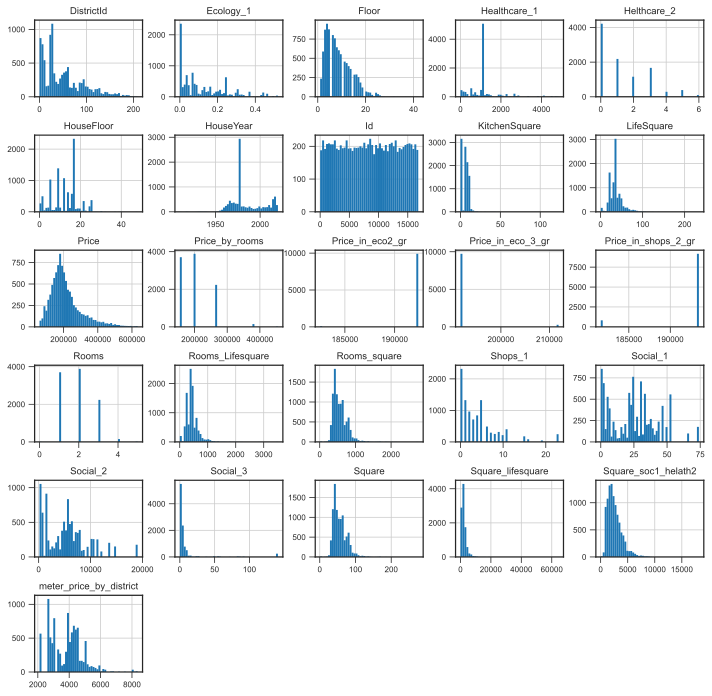

In [50]:
matplotlib.rcParams.update({'font.size': 8})

feature_names = train.columns

train[feature_names].hist(figsize=(12, 12), bins=50, grid=True)
plt.subplots_adjust(hspace=0.5)

plt.show()

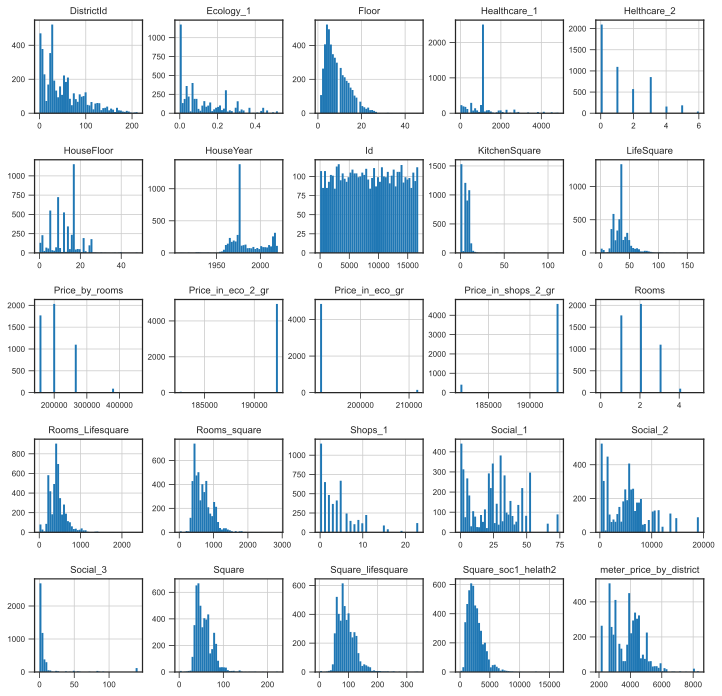

In [51]:
matplotlib.rcParams.update({'font.size': 8})

test_feature_names = test.columns

test[test_feature_names].hist(figsize=(12, 12), bins=50, grid=True)
plt.subplots_adjust(hspace=0.5)

plt.show()

## Разбиение на трейн и тест

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

In [53]:
X = train.drop(['Price','Id'], axis=1)
y = train['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(8000, 24) (8000,)
(2000, 24) (2000,)


## Логарифмируем скошенные графики и добавим значимые в датасет

In [54]:
#feature_skewed_names = ['Ecology_1', 'Floor', 'Healthcare_1', 'HouseFloor', 'HouseYear', 'KitchenSquare', 'LifeSquare', 
#                        'PriceEco_2_gr', 'PriceEco_3_gr', 'PriceShops_2_gr', 'Rooms_Lifesquare', 'Rooms_square', 'Shops_1',
#                        'Social_1', 'Social_2', 'Social_3', 'Square', 'Square_lifesquare', 'Squre_KitchenSquare', 'district_meter_price']
#feature_log_names = []
#for f in feature_skewed_names:
#    X_train[f + '_log'] = np.log(X_train[f])
#    X_test[f + '_log'] = np.log(X_test[f])
#    feature_log_names.append(f + '_log')

In [55]:
#X_train.describe().T

## Стандартизация признаков

In [56]:
scaler = RobustScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index)

X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [57]:
X_train_scaled.describe().T

count        mean          std           min  \
DistrictId               8000.0    0.263520     0.794393     -0.654545   
Rooms                    8000.0   -0.114500     0.810846     -2.000000   
Square                   8000.0    0.149431     0.787013     -2.074227   
LifeSquare               8000.0   -0.058952     0.998346     -2.331382   
KitchenSquare            8000.0   -0.014719     0.659384     -0.750000   
Floor                    8000.0    0.186547     0.652655     -0.750000   
HouseFloor               8000.0   -0.051406     0.821368     -1.625000   
HouseYear                8000.0    0.294523     0.680165     -2.407407   
Ecology_1                8000.0    0.210354     0.656441     -0.444444   
Social_1                 8000.0   -0.009029     0.586981     -0.833333   
Social_2                 8000.0    0.012826     0.701884     -0.894111   
Social_3                 8000.0    1.201300     4.744002     -0.400000   
Healthcare_1             8000.0   -0.011290     2.357182     -3.652605   
Helthcare_2              8000.0    0.156688     0.744681     -0.500000   
Shops_1                  8000.0    0.249275     0.961204     -0.600000   
Price_in_eco2_gr         8000.0  -92.391281   949.789007  -9855.070000   
Price_in_eco_3_gr        8000.0  568.730813  3343.434680      0.000000   
Price_in_shops_2_gr      8000.0 -983.047056  3265.056407 -11826.130000   
meter_price_by_district  8000.0   -0.099502     0.671853     -1.268190   
Price_by_rooms           8000.0    0.032873     1.075248     -1.000000   
Rooms_square             8000.0    0.148649     0.785750     -2.072016   
Rooms_Lifesquare         8000.0    0.146346     1.080563     -2.062071   
Square_lifesquare        8000.0    0.261518     1.148807     -1.022395   
Square_soc1_helath2      8000.0    0.175816     0.838550     -1.368000   

                              25%           50%       75%           max  
DistrictId              -0.290909  0.000000e+00  0.709091      3.145455  
Rooms                   -1.000000  0.000000e+00  0.000000      3.000000  
Square                  -0.446294  0.000000e+00  0.553706      9.226093  
LifeSquare              -0.735243  0.000000e+00  0.264757     12.454502  
KitchenSquare           -0.625000  0.000000e+00  0.375000     14.625000  
Floor                   -0.375000  0.000000e+00  0.625000      4.375000  
HouseFloor              -0.500000  0.000000e+00  0.500000      4.375000  
HouseYear               -0.111111  0.000000e+00  0.888889      1.592593  
Ecology_1               -0.333333  0.000000e+00  0.666667      2.444444  
Social_1                -0.633333  0.000000e+00  0.366667      1.633333  
Social_2                -0.650183  0.000000e+00  0.349817      2.410973  
Social_3                -0.400000  0.000000e+00  0.600000     27.800000  
Healthcare_1            -1.000000  0.000000e+00  0.000000     11.844359  
Helthcare_2             -0.500000  0.000000e+00  0.500000      2.500000  
Shops_1                 -0.400000  0.000000e+00  0.600000      4.000000  
Price_in_eco2_gr         0.000000  0.000000e+00  0.000000      0.000000  
Price_in_eco_3_gr        0.000000  0.000000e+00  0.000000  20221.540000  
Price_in_shops_2_gr      0.000000  0.000000e+00  0.000000      0.000000  
meter_price_by_district -0.691329  0.000000e+00  0.308671      2.993395  
Price_by_rooms          -1.000000  0.000000e+00  0.000000      5.624786  
Rooms_square            -0.447737  2.339166e-16  0.552263      9.194239  
Rooms_Lifesquare        -0.543372  0.000000e+00  0.456628     15.778946  
Square_lifesquare       -0.416151  0.000000e+00  0.583849     35.962010  
Square_soc1_helath2     -0.407470  0.000000e+00  0.592530      9.777922

## Построение модели

In [58]:
from sklearn.model_selection import KFold, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [59]:
def evaluate_preds(true_values_train, pred_values_train, true_values_test, pred_values_test):
    print('Train:\t' + 'R2 = ' + str(round(r2_score(true_values_train, pred_values_train), 3)) + 
          '\tMAE = ' + str(int(mean_absolute_error(true_values_train, pred_values_train))) +
          '\n' +
          'Test:\t' + 'R2 = ' + str(round(r2_score(true_values_test, pred_values_test), 3)) +
          '\tMAE = ' + str(int(mean_absolute_error(true_values_test, pred_values_test)))
         )
    
    plt.figure(figsize=(8, 4))
       
    plt.subplot(121)
    sns.scatterplot(x=pred_values_train, y=true_values_train)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Train: True vs Predicted values');
    
    plt.subplot(122)
    sns.scatterplot(x=pred_values_test, y=true_values_test)
    plt.xlabel('Predicted values')
    plt.ylabel('True values')
    plt.title('Test: True vs Predicted values');

# Финальная модель

In [60]:
gbr = GradientBoostingRegressor(random_state=42, max_depth=3, n_estimators=300)

gbr.fit(X_train_scaled, y_train)

y_pred = gbr.predict(X_test_scaled)

r2_score(y_test, y_pred)

0.7308834915277385

Train:	R2 = 0.844	MAE = 23374
Test:	R2 = 0.731	MAE = 27807


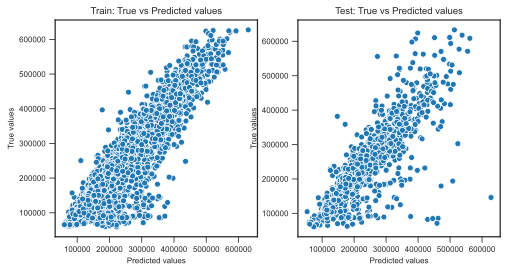

In [61]:
y_train_preds = gbr.predict(X_train_scaled)
y_test_preds = gbr.predict(X_test_scaled)

evaluate_preds(y_train, y_train_preds, y_test, y_test_preds)

In [62]:
test = test.drop(['Id'], axis=1)

In [63]:
test_scaled = pd.DataFrame(scaler.transform(test), columns=test.columns, index=test.index)

test_scaled

DistrictId  Rooms    Square  LifeSquare  KitchenSquare  Floor  \
0       0.400000    0.0 -0.109997   -0.238645          0.000 -0.125   
1       0.690909    0.0  0.691409    0.000000         -0.625 -0.125   
2       2.800000   -1.0 -1.610255   -1.345150          0.750 -0.625   
3       0.200000    0.0  0.848134    0.933059          0.375  1.875   
4      -0.163636   -1.0 -0.207175    0.391834         -0.625  1.250   
...          ...    ...       ...         ...            ...    ...   
4995   -0.454545    1.0  0.603329    0.861529          0.000 -0.250   
4996   -0.636364   -1.0 -0.510286   -0.974205          0.500  0.625   
4997   -0.436364    1.0  1.046211    0.701377          0.375  2.000   
4998    0.472727    0.0  1.189703    0.000000         -0.750 -0.375   
4999   -0.109091    0.0  0.331645    0.000000         -0.625  0.375   

      HouseFloor  HouseYear  Ecology_1  Social_1  ...  Shops_1  \
0          0.125  -0.185185   1.277778 -0.466667  ...     -0.6   
1         -1.500   0.000000   0.000000 -0.633333  ...     -0.2   
2         -1.000  -2.518519  -0.444444  0.166667  ...      0.4   
3          1.125   1.111111   0.111111 -0.066667  ...      0.0   
4          0.500   1.481481  -0.055556 -0.766667  ...     -0.6   
...          ...        ...        ...       ...  ...      ...   
4995      -0.500  -0.148148  -0.444444  0.366667  ...     -0.4   
4996       0.500   1.481481  -0.388889 -0.800000  ...     -0.4   
4997       1.125   0.444444   0.055556  1.633333  ...      2.4   
4998      -1.625   0.000000  -0.055556 -0.766667  ...     -0.6   
4999       0.500   0.000000  -0.444444 -0.100000  ...      4.0   

      Price_in_eco_2_gr  Price_in_eco_gr  Price_in_shops_2_gr  \
0                   0.0              0.0                 0.00   
1                   0.0              0.0                 0.00   
2                   0.0              0.0                 0.00   
3                   0.0              0.0                 0.00   
4                   0.0              0.0            -11826.13   
...                 ...              ...                  ...   
4995                0.0              0.0                 0.00   
4996                0.0              0.0                 0.00   
4997                0.0              0.0                 0.00   
4998                0.0              0.0            -11826.13   
4999                0.0              0.0                 0.00   

      meter_price_by_district  Price_by_rooms  Rooms_square  Rooms_Lifesquare  \
0                   -0.691329        0.000000      0.293251         -0.040923   
1                   -0.331293        0.000000      1.250288          0.189344   
2                    2.993395       -1.000000     -1.554321         -1.189764   
3                   -0.101504        0.000000      1.437449          1.089646   
4                   -0.886397       -1.000000     -0.018395          0.346571   
...                       ...             ...           ...               ...   
4995                 0.152686        1.508613      1.421358          1.279245   
4996                -0.624239       -1.000000     -0.350206         -0.861669   
4997                -0.042034        1.508613      1.994321          1.111838   
4998                -0.756531        0.000000      1.845350          0.189344   
4999                -0.859965        0.000000      0.820658          0.189344   

      Square_lifesquare  Square_soc1_helath2  
0             -0.975802            -0.448164  
1             -0.962525            -0.291476  
2             -1.006635            -0.939681  
3             -0.951898             0.668764  
4             -0.971438            -0.756406  
...                 ...                  ...  
4995          -0.955941             0.955757  
4996          -0.988018            -0.880449  
4997          -0.951250             3.344597  
4998          -0.955614            -0.298827  
4999          -0.967515             0.277720  

[5000 rows x 24 columns]

In [65]:
test_price_pred = gbr.predict(test_scaled)

test_price_pred

array([163824.79975053, 241234.02391065, 337159.95026939, ...,
       336240.21269837, 212165.37911682, 195189.739824  ])